In [1]:
from test import lag_plot
import pandas as pd

In [2]:
from sklearn.cluster import KMeans



In [3]:
df = pd.read_csv('data/3/DailyDelhiClimateTrain.csv')

In [4]:
data = lag_plot(df['meantemp'], 1)
data

[[10.0, 7.4],
 [7.4, 7.166666666666667],
 [7.166666666666667, 8.666666666666666],
 [8.666666666666666, 6.0],
 [6.0, 7.0],
 [7.0, 7.0],
 [7.0, 8.857142857142858],
 [8.857142857142858, 14.0],
 [14.0, 11.0],
 [11.0, 15.714285714285714],
 [15.714285714285714, 14.0],
 [14.0, 15.833333333333334],
 [15.833333333333334, 12.833333333333334],
 [12.833333333333334, 14.714285714285714],
 [14.714285714285714, 13.833333333333334],
 [13.833333333333334, 16.5],
 [16.5, 13.833333333333334],
 [13.833333333333334, 12.5],
 [12.5, 11.285714285714286],
 [11.285714285714286, 11.2],
 [11.2, 9.5],
 [9.5, 14.0],
 [14.0, 13.833333333333334],
 [13.833333333333334, 12.25],
 [12.25, 12.666666666666666],
 [12.666666666666666, 12.857142857142858],
 [12.857142857142858, 14.833333333333334],
 [14.833333333333334, 14.125],
 [14.125, 14.714285714285714],
 [14.714285714285714, 16.2],
 [16.2, 16.0],
 [16.0, 16.285714285714285],
 [16.285714285714285, 18.0],
 [18.0, 17.428571428571427],
 [17.428571428571427, 16.625],
 [16.62

In [5]:
kmeans = KMeans(100)

In [6]:
kmeans.fit(data)

/home/shail/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=100)

In [7]:
pts = kmeans.cluster_centers_

In [8]:
x = [i[0] for i in pts]
y = [i[1] for i in pts]

In [9]:
import matplotlib.pyplot as plt

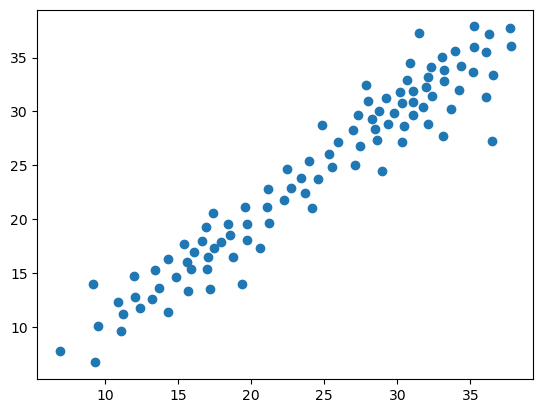

In [10]:
plt.scatter(x, y)